<a href="https://colab.research.google.com/github/Pio2022/dados/blob/main/Ubiratan_Piovezan_Exercicio_2_Resolvido_KNN_digits_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Objetivo: criar um modelo de KNN capaz de previr multiclasses de digitos do dataset mnist 

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

* Ler o banco de dígitos
* separar dados de treinamento e teste
* calcular a acurácia
* testar com dados novos



In [19]:
# Carregando os pacotes necessários
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [20]:
# Carregando o dataset
digitos = datasets.load_digits()

In [ ]:
digitos

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

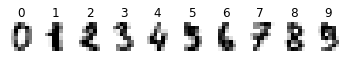

In [21]:
# Loop usado para imprimir 10 imagens do conjunto de dados usado para o treinamento
images_e_labels = list(zip(digitos.images, digitos.target))
for index, (image, label) in enumerate(images_e_labels[:10]):
    plt.subplot(4, 10, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap = plt.cm.gray_r, interpolation='nearest')
    plt.title('%i' % label)

In [22]:
# Criando as variaveis X e Y
X = digitos.data
y = digitos.target

In [23]:
# Imprimindo o formato de X e Y
print(X.shape, y.shape)

(1797, 64) (1797,)


#### Separar dados de treino e teste

In [24]:
# Divisão em dados de treino e de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

#### Instancia e treinamento do modelo 

In [25]:
# Criando a versão final do modelo com o maior valor de k
knn = KNeighborsClassifier(n_neighbors = 3)

In [26]:
# Treinamento do modelo
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
print("score train: ", knn.score(X_train, y_train) )


score train:  0.9952267303102625


Previsao com dados de teste e medida da acurácia

In [28]:
# Previsões com os dados de teste
predictions = knn.predict(X_test)

In [29]:
print("score test: ", knn.score(X_test, y_test) )


score test:  0.9851851851851852


Criando uma imagem de digito para fazer a previsão

In [30]:
# Definindo um novo dígito (dados de entrada)
new_image = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              0.,  0.,  0.,  0.,  0.,  3., 16.,  7.,  0.,  0.,  0.,  0.,  0.,
              6., 16.,  2.,  0.,  0.,  0.,  0.,  0.,  7., 16., 16., 13.,  5.,
              0.,  0.,  0., 15., 16.,  9.,  9., 14.,  0.,  0.,  0.,  3., 14.,
              9.,  2., 16.,  2.,  0.,  0.,  0.,  7., 15., 16., 11.,  0.]

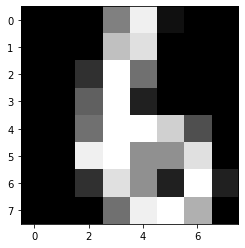

In [31]:
# Imprimindo a imagem para conferencia
imgdata = np.array(new_image, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.show()

In [32]:
# Fazendo a previsão com o modelo treinado
pred_number = knn.predict([new_image])
print("Esta imagem deve ser um " + str(pred_number))

Esta imagem deve ser um [6]


In [33]:
# testando com uma nova imagem 
new_image = [0.,  0.,  0.,  8., 15.,  1.,  0.,  0.,  0.,  0.,  0., 12., 14.,
              13.,  0.,  0.,  0.,  0.,  4., 14., 16.,  9.,  0.,  0.,  0., 10.,
              16., 11., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,
              0.,  0.,  0.,  0.,  3., 16.,  8.,  0.,  0.,  0.,  0.,  0.,  5.,
              16., 10.,  0.,  0.,  0.,  0.,  0.,  2., 14.,  6.,  0.,  0.]

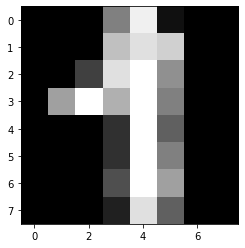

In [34]:
# Imprimindo a imagem para conferencia
imgdata = np.array(new_image, dtype='float')
pixels = imgdata.reshape((8,8))
plt.imshow(pixels, cmap='gray')
plt.show()

In [35]:
# Fazendo a previsão com o modelo treinado
pred_number = knn.predict([new_image])
print("Esta imagem deve ser um " + str(pred_number))

Esta imagem deve ser um [1]
